---
# Section 1
---

# I. Naive Bayes (20 pts)

In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use

```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

To fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0,255] and the corresponding label is an integer $y\in [0,9]$. Each image should be transformed into a 1D integer array $x\in [0,255]^{784}$.

```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Divide your data into train and test sets in a 80-20 ration split. And plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

In [13]:
# Implement here
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that the probability of a pixel $i$ to be on given that the digit is $j$ is:
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Research the differences between the three types of Naive Bayes classifiers: Bernoulli NB, Multinomial NB, and Gaussian NB.
Describe in your own words what makes each type unique and specify the kind of tasks for which you would prefer each one.

#### Answer 1
- **Bernoulli Naive Bayes:** This classifier works with binary data (0 or 1), treating features as either present or absent. It is best for tasks like spam detection or sentiment analysis where the presence of specific features (e.g., words) matters more than their frequency.

- **Multinomial Naive Bayes:** Designed for count-based data, it considers the frequency of features. It is commonly used in text classification, TF-IDF and NLP tasks, such as document categorization or sentiment analysis, where the importance of features depends on how often they appear.

- **Gaussian Naive Bayes:** Handles continuous data by assuming a Gaussian (normal) distribution for features. It is suited for tasks like medical diagnosis or sensor data analysis, where inputs are real-valued measurements like age or pressure.

#### Question 2
Train a Naive Bayes classifier using the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this purpose, use the `binarize` parameter of the `BernoulliNB` function. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

    A **confusion matrix** for a multi-class classifier is a table that summarizes the performance of the model by comparing the predicted class labels to the true class labels: Each row represents the actual class, and each column represents the predicted class. The diagonal elements indicate the number of correct predictions for each class. Off-diagonal elements show misclassifications (e.g., how many times one class was predicted as another).


2. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**

#### Answer 2
Put you answer here...

Answers 1-2:

Accuracy: 0.8413


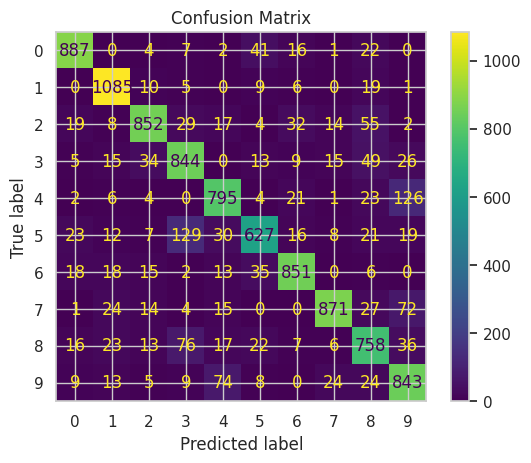

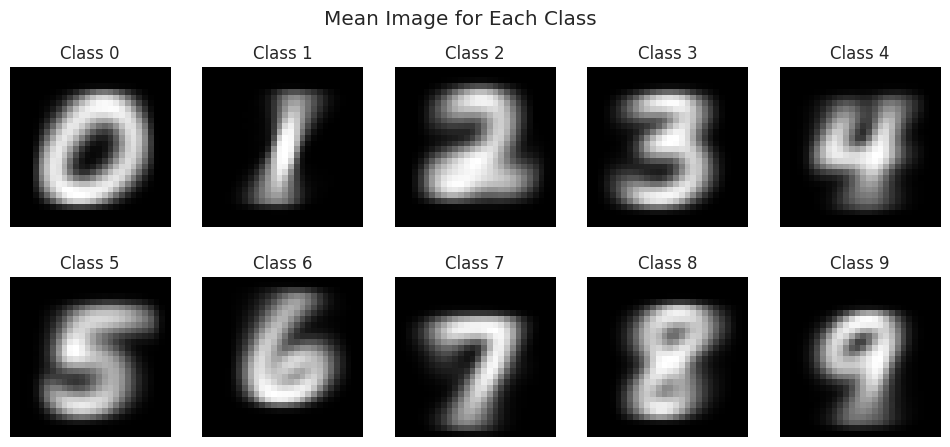

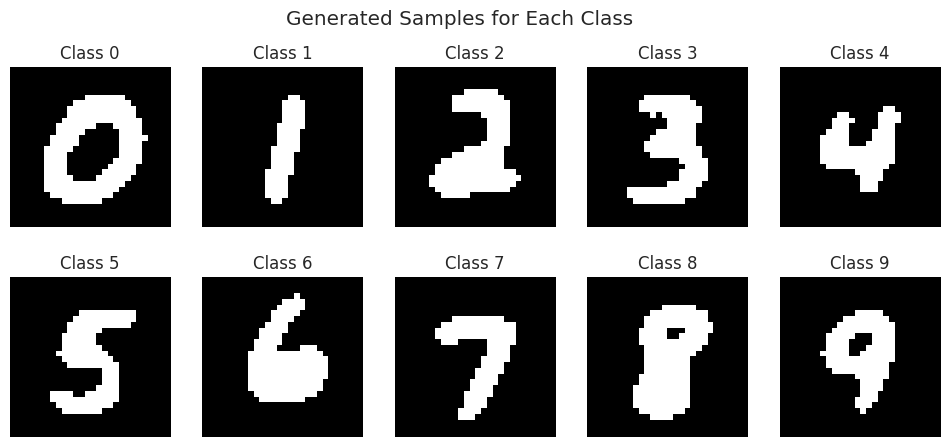

In [14]:
# code goes here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Train Bernoulli Naive Bayes
model = BernoulliNB(binarize=0)
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10)).plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

# Plot mean image for each class
mean_images = np.exp(model.feature_log_prob_).reshape(10, 28, 28)  # Exponentiate log probabilities
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(mean_images[i], cmap="gray")
    ax.set_title(f"Class {i}")
    ax.axis("off")
plt.suptitle("Mean Image for Each Class")
plt.show()

# Generate one sample of each class
generated_samples = (mean_images > 0.5).astype(int)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(generated_samples[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Class {i}")
    ax.axis("off")
plt.suptitle("Generated Samples for Each Class")
plt.show()


3. To optimize the binarization threshold, iteratively test thresholds and choose the one with the best validation accuracy. This ensures the model learns the most from the data representation.

# II. Perceptron Algorithm (20 points)
1.	Provide an example of four samples in $R^2$ of a non-linearly separable dataset and describe the behavior of the perceptron algorithm when applied to it.

**Example of four samples:**
- $Samples:{(0,0),(0,1),(1,0),(1,1)}$
- $Labels: {-1,1,1,-1}$

**The behavior of the perceptron algorithm:**

The perceptron will try to find weights 𝑤 and bias 𝑏 that satisfy: $y(w*x+b) > 0$

The perceptron repeatedly updates 𝑤 and 𝑏 when a misclassification occurs.
Since the dataset is non-linearly separable, the algorithm never stops because there’s always at least one misclassified point.




2. Prove no-convergence for this case.

In order to prove no-convergence we will provide severl attempts to classify the samples:

In [ ]:
import numpy as np

# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([-1, 1, 1, -1])  # XOR labels

# Perceptron function
def perceptron(X, y, max_epochs=10):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    print(f"Initial weights: {w}, bias: {b}")

    for epoch in range(max_epochs):
        print(f"\nEpoch {epoch + 1}:")
        misclassified = 0

        for i in range(len(X)):
            # Prediction: sign(w · x + b)
            pred = np.sign(np.dot(w, X[i]) + b)
            pred = 1 if pred >= 0 else -1  # Ensure sign output is 1 or -1

            # Check if prediction is correct
            if pred != y[i]:
                # Update weights and bias
                w += y[i] * X[i]
                b += y[i]
                misclassified += 1
                print(f"Misclassified: {X[i]} (label: {y[i]}), updated weights: {w}, bias: {b}")
            else:
                print(f"Correctly classified: {X[i]} (label: {y[i]})")

        # Check if the perceptron converged
        if misclassified == 0:
            print("\nPerceptron converged!")
            break
    else:
        print("\nPerceptron did not converge.")

    return w, b

# Train perceptron
weights, bias = perceptron(X, y, max_epochs=10)


Initial weights: [0. 0.], bias: 0

Epoch 1:
Misclassified: [0 0] (label: -1), updated weights: [0. 0.], bias: -1
Misclassified: [0 1] (label: 1), updated weights: [0. 1.], bias: 0
Correctly classified: [1 0] (label: 1)
Misclassified: [1 1] (label: -1), updated weights: [-1.  0.], bias: -1

Epoch 2:
Correctly classified: [0 0] (label: -1)
Misclassified: [0 1] (label: 1), updated weights: [-1.  1.], bias: 0
Misclassified: [1 0] (label: 1), updated weights: [0. 1.], bias: 1
Misclassified: [1 1] (label: -1), updated weights: [-1.  0.], bias: 0

Epoch 3:
Misclassified: [0 0] (label: -1), updated weights: [-1.  0.], bias: -1
Misclassified: [0 1] (label: 1), updated weights: [-1.  1.], bias: 0
Misclassified: [1 0] (label: 1), updated weights: [0. 1.], bias: 1
Misclassified: [1 1] (label: -1), updated weights: [-1.  0.], bias: 0

Epoch 4:
Misclassified: [0 0] (label: -1), updated weights: [-1.  0.], bias: -1
Misclassified: [0 1] (label: 1), updated weights: [-1.  1.], bias: 0
Misclassified: [1

We can see that non of the attempts above sucsseeded to classify the samples as expected.

3. Discuss how the perceptron algorithm could be modified to handle datasets that are not linearly separable.

We can use **Multi-Layer Perceptrons (MLPs)** - neural networks with multiple layers, including hidden layers with non-linear activation functions. This enables them to learn complex, non-linear patterns in data, making them suitable for tasks where linear separation isn't possible.

---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (60 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/219246964ae74bb48a729eee89895617

In this section you are allow to use only Decision Tree as your ML model.



### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


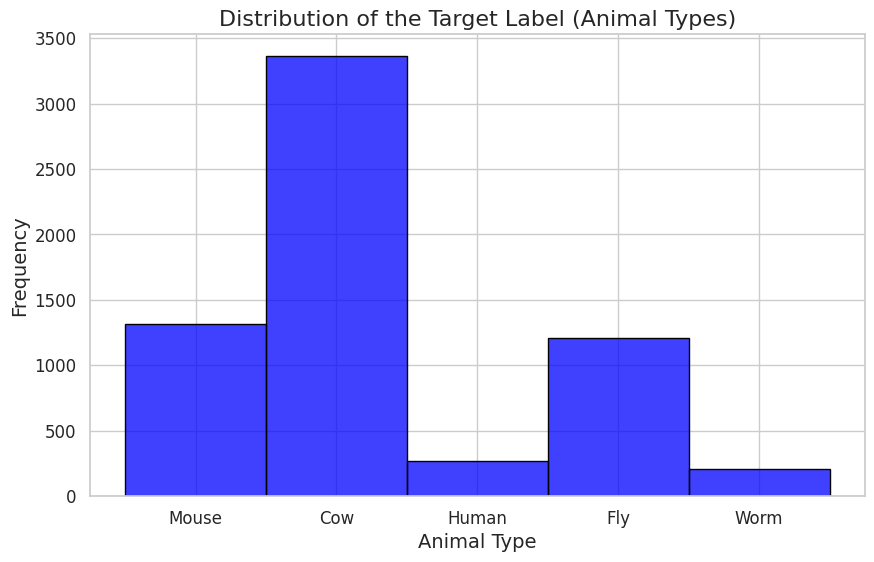

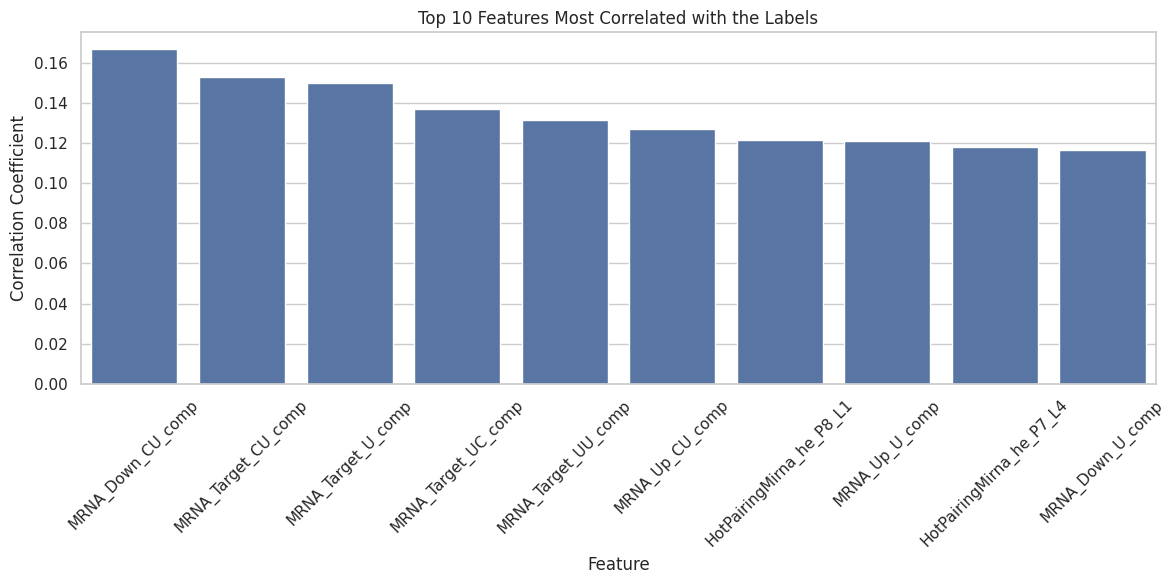

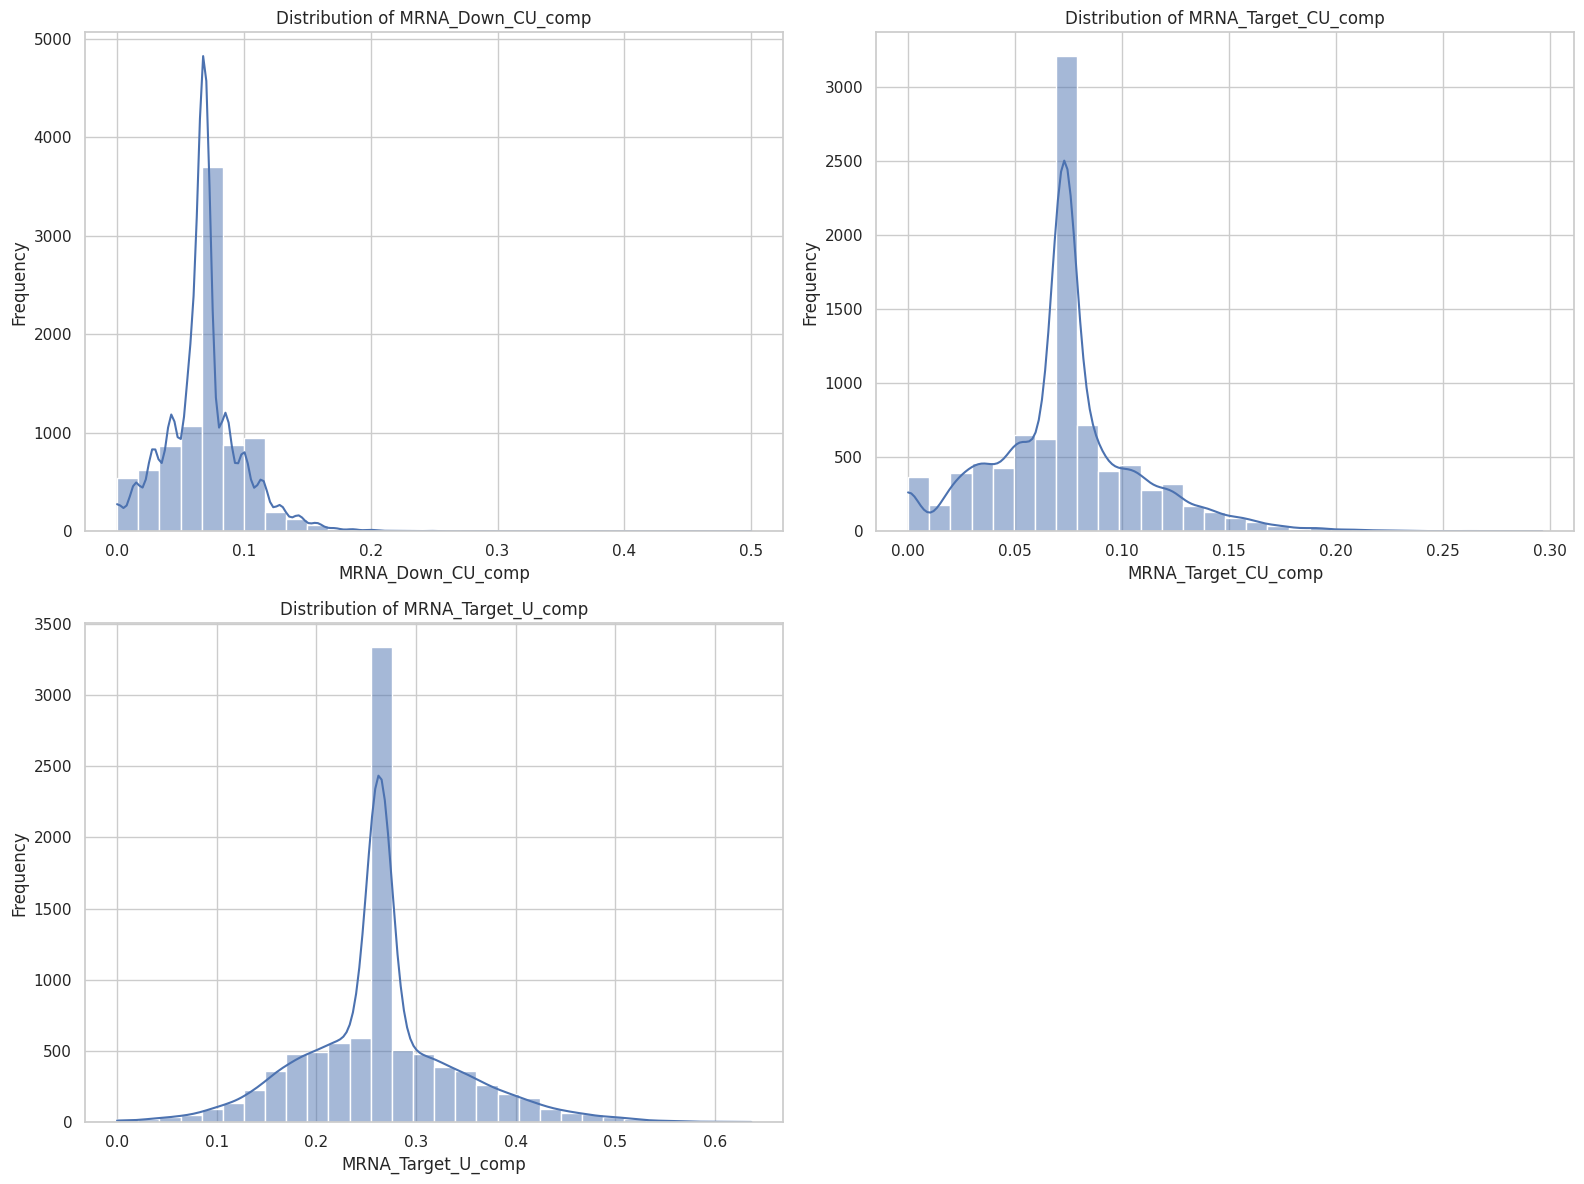

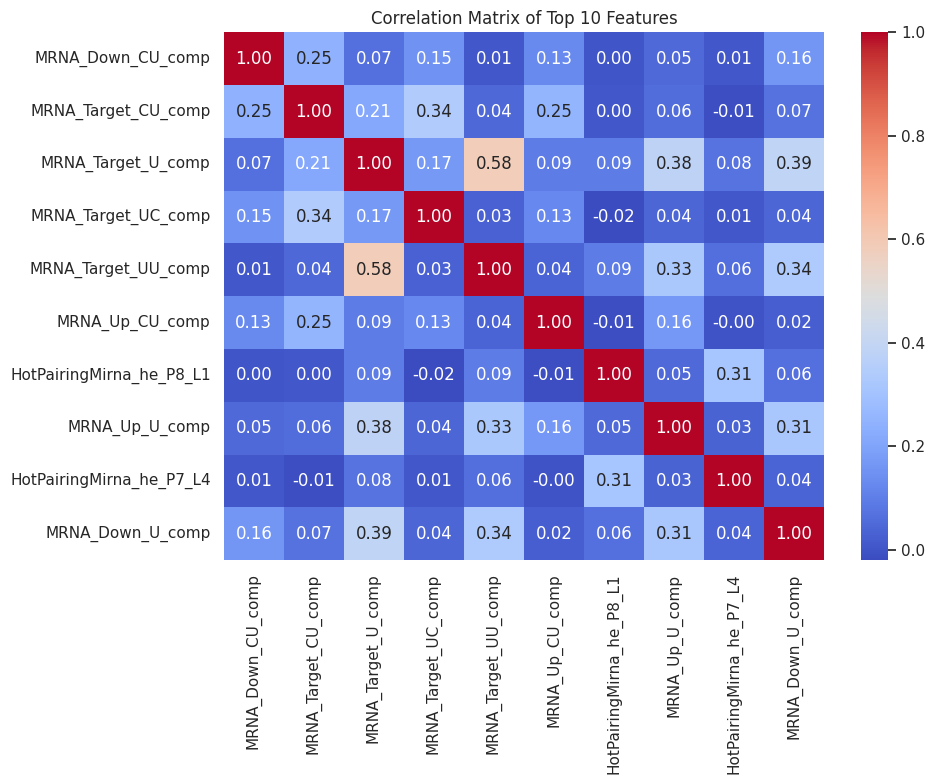

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load the datasets
x_train = pd.read_csv('/content/x_train.csv')
y_train = pd.read_csv('/content/y_train.csv')
x_test = pd.read_csv('/content/x_test.csv')

# Merge x_train and y_train for analysis
data = pd.merge(x_train, y_train, on='id', how='inner')

# Define a mapping from numeric labels to animal names
label_mapping = {
    1: 'Fly',
    2: 'Cow',
    3: 'Human',
    4: 'Mouse',
    5: 'Worm'
}

# Replace numeric labels with animal names
data['label'] = data['label'].map(label_mapping)

# Fill missing values with column means for numeric columns
data_filled = data.copy()
data_filled.loc[:, data_filled.select_dtypes(include=['float64', 'int64']).columns] = data_filled.select_dtypes(include=['float64', 'int64']).fillna(data_filled.mean(numeric_only=True))

# 1. Distribution of Labels
sns.set(style="whitegrid")

# Plot distribution of the 'label' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='label', bins=len(label_mapping), kde=False, color='blue', edgecolor='black')
plt.title('Distribution of the Target Label (Animal Types)', fontsize=16)
plt.xlabel('Animal Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 2. Correlation of Features with Label
# Calculate correlations with the label (using numeric encoding for labels)
label_numeric_mapping = {v: k for k, v in label_mapping.items()}
data_filled = pd.concat([data_filled, data['label'].map(label_numeric_mapping).rename('label_numeric')], axis=1)
correlation_with_label = data_filled.corr(numeric_only=True)['label_numeric'].sort_values(ascending=False)

# Select the top 10 features most correlated with the label
top_correlated_features = correlation_with_label.head(11).drop('label_numeric')

# Plot the correlation of the top 10 features with the label
plt.figure(figsize=(12, 6))
sns.barplot(x=top_correlated_features.index, y=top_correlated_features.values)
plt.title("Top 10 Features Most Correlated with the Labels")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Distribution of Top 3 Features Most Correlated with Label
plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_correlated_features.index[:3]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data_filled[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap of Top Features
plt.figure(figsize=(10, 8))
sns.heatmap(data_filled[top_correlated_features.index].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of Top 10 Features")
plt.tight_layout()
plt.show()


Explainations:
1. Distribution of Labels: This graph shows the frequency distribution of animal types (Fly, Cow, Human, Mouse, Worm) in the dataset.

2. Correlation of Features with Label: This bar plot displays the top 10 features that have the highest correlation coefficients with the target labels.

3. Distribution of Top 3 Features Most Correlated with Label: These histograms show the frequency distributions of the top three features most strongly correlated with the target label.

4. Correlation Heatmap of Top Features: This heatmap shows the pairwise correlations among the top 10 features most correlated with the target label.

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it.

***Write your code below***

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Merge x_train and y_train on 'id'
data = pd.merge(x_train, y_train, on='id', how='inner')

# Drop 'id' column
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# Separate features and target
X = data.drop(columns=['label'])
y = data['label']

# Detect numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data (using KNN Imputer)
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5, weights='uniform')),  # Use KNN for imputation
    ('scaler', RobustScaler())  # Robust scaling to handle outliers
])

# Handle categorical data with frequency encoding and SimpleImputer for missing values
def frequency_encode(df, column):
    freq = df[column].value_counts() / len(df)
    return df[column].map(freq)

if len(categorical_columns) > 0:
    valid_categorical_columns = []
    for col in categorical_columns:
        if X[col].nunique() > 10:  # Apply frequency encoding only for high-cardinality columns
            X[col] = frequency_encode(X, col)
        else:
            valid_categorical_columns.append(col)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical data
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode for low-cardinality columns
    ])
else:
    categorical_transformer = None

# Combine preprocessors in a ColumnTransformer
transformers = [('num', numerical_transformer, numerical_columns)]
if categorical_transformer and valid_categorical_columns:
    transformers.append(('cat', categorical_transformer, valid_categorical_columns))

preprocessor = ColumnTransformer(
    transformers=transformers
)

# Encode target variable if necessary
if y.dtypes == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Preprocess X
print("Starting preprocessing...")
X_processed = preprocessor.fit_transform(X)
print("Preprocessing complete.")
x_test_processed = preprocessor.transform(x_test)

# Handle NaN values in y if necessary
if y.isnull().sum() > 0:
    y.fillna(y.mode()[0], inplace=True)

# Split the data for training and validation using stratified sampling
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Address class imbalance with SMOTE oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display processed data shapes
print(f"X_train shape after resampling: {X_train_resampled.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape after resampling: {y_train_resampled.shape}")
print(f"y_val shape: {y_val.shape}")


Starting preprocessing...
Preprocessing complete.
X_train shape after resampling: (24210, 682)
X_val shape: (1811, 682)
y_train shape after resampling: (24210,)
y_val shape: (1811,)



**Explanation** : We prepared the data by combining features and labels, filling in missing values with KNNImputer, scaling numbers with RobustScaler, encoding categories using one-hot or frequency encoding, and converting the target labels into numbers. The data was then split into training and validation sets, and the same preprocessing was applied to both training and test data, making it ready for modeling.

### Model training (10 pts):
Train your Decision Tree model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Simplified parameter grid, applied only to the DecisionTreeClassifier
param_grid = {
    'model__criterion': ['gini', 'entropy'],  # Split criteria for the model step in the pipeline
    'model__max_depth': [5, 10, 15],          # Tree depth
    'model__min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'model__min_samples_leaf': [1, 2, 10]         # Minimum samples required at a leaf node
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Using class_weight to handle imbalance

# Use StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Use SMOTE to handle class imbalance by oversampling the minority class
smote = SMOTE(random_state=42)
pipeline = Pipeline([('smote', smote), ('model', dt)])

# Use RandomizedSearchCV with stratified k-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and model
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'model__min_samples_split': 10, 'model__min_samples_leaf': 10, 'model__max_depth': 10, 'model__criterion': 'entropy'}


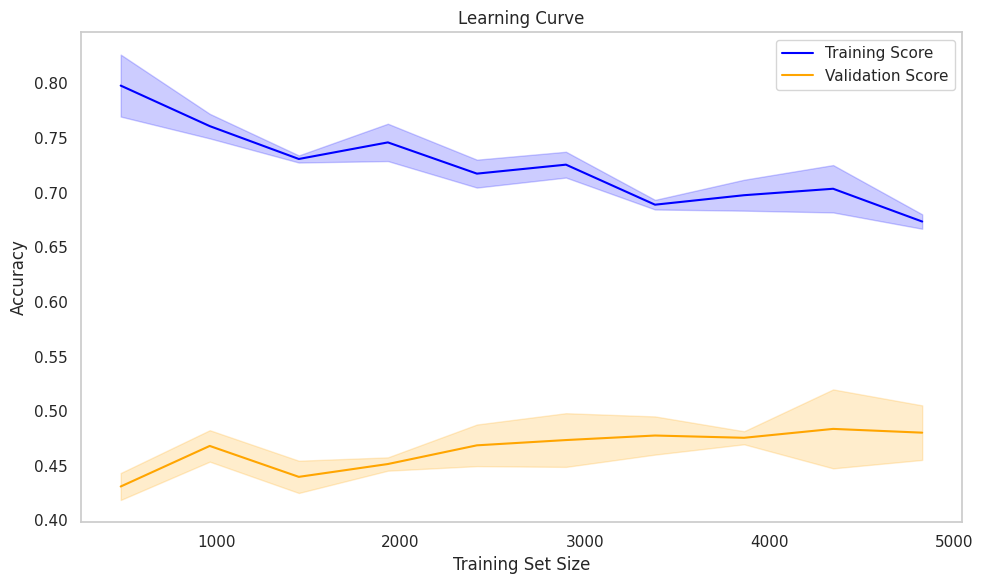

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, color='orange', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Explain here

We trained a Decision Tree Classifier with RandomizedSearchCV to efficiently search the hyperparameters, randomly sampling combinations of parameters to find the best modeand and StratifiedKFold cross-validation for balanced splits. SMOTE handled class imbalance, and cross-validation ensured consistent evaluation, minimizing overfitting.

### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [7]:
# Implement here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

# Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

# Micro Precision
micro_precision = precision_score(y_val, y_val_pred, average='micro')
print(f"Micro Precision: {micro_precision:.4f}")

# Micro Recall
micro_recall = recall_score(y_val, y_val_pred, average='micro')
print(f"Micro Recall: {micro_recall:.4f}")

# Micro F1-score
micro_f1 = f1_score(y_val, y_val_pred, average='micro')
print(f"Micro F1-score: {micro_f1:.4f}")

# Macro Precision
macro_precision = precision_score(y_val, y_val_pred, average='macro')
print(f"Macro Precision: {macro_precision:.4f}")

# Macro Recall
macro_recall = recall_score(y_val, y_val_pred, average='macro')
print(f"Macro Recall: {macro_recall:.4f}")

# Macro F1-score
macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Macro F1-score: {macro_f1:.4f}")

# Weighted Precision
weighted_precision = precision_score(y_val, y_val_pred, average='weighted')
print(f"Weighted Precision: {weighted_precision:.4f}")

# Weighted Recall
weighted_recall = recall_score(y_val, y_val_pred, average='weighted')
print(f"Weighted Recall: {weighted_recall:.4f}")

# Weighted F1-score
weighted_f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"Weighted F1-score: {weighted_f1:.4f}")


Accuracy: 0.4798
Balanced Accuracy: 0.3935
Micro Precision: 0.4798
Micro Recall: 0.4798
Micro F1-score: 0.4798
Macro Precision: 0.3224
Macro Recall: 0.3935
Macro F1-score: 0.3337
Weighted Precision: 0.5987
Weighted Recall: 0.4798
Weighted F1-score: 0.5200


In [ ]:
# List of evaluation metrics
# Accuracy - 0.4798
# Balanced Accuracy - 0.3935
# Micro Precision - 0.4798
# Micro Recall - 0.4798
# Micro F1-score - 0.4798
# Macro Precision - 0.3224
# Macro Recall - 0.3935
# Macro F1-score - 0.3337
# Weighted Precision - 0.5987
# Weighted Recall - 0.4798
# Weighted F1-score - 0.5200

The evaluation metrics provide insights into the model's performance.
These metrics are relevant as the task involves handling imbalanced data.

### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

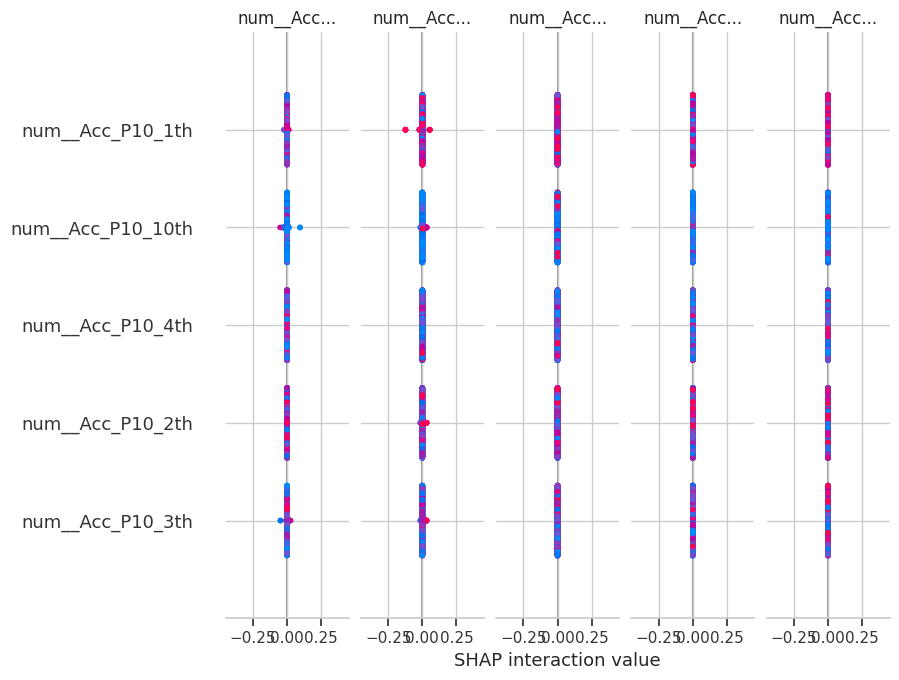

In [12]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the mapping of labels to animal names
label_to_animal = {
    1: 'Fly',
    2: 'Cow',
    3: 'Human',
    4: 'Mouse',
    5: 'Worm'
}

# Extract feature names from the preprocessor dynamically
feature_names = preprocessor.get_feature_names_out()

# Step 1: Convert to DataFrame if needed and assign feature names
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)

if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val, columns=feature_names)

# Step 2: Ensure all data is numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 3: Align columns for X_val and X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Step 4: Create SHAP TreeExplainer (assuming `best_model` is a tree-based model)
explainer = shap.TreeExplainer(best_model.named_steps['model'])

# Step 5: Compute SHAP Values
shap_values = explainer.shap_values(X_val)

# Step 6: Plot SHAP Summary with Feature Names
shap.summary_plot(shap_values, X_val, feature_names=feature_names)

**Conclusions based on SHAP Outputs**

The SHAP summary plot shows that num__Acc_P10_1th is the most impactful feature, with high values (red) strongly influencing predictions positively, while low values (blue) push predictions negatively. Other features like num__Acc_P10_10th and num__Acc_P10_4th also contribute significantly but with more balanced impacts. num__Acc_P10_3th has a smaller, consistent effect, suggesting it plays a supporting role.

### Competition rank (10 pts):
The competition will be open between 29.12.24 until 11.1.25 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [9]:
# Predict on the test set
y_test_pred = best_model.predict(x_test_processed)

if 'label_encoder' in locals():
    y_test_pred = label_encoder.inverse_transform(y_test_pred)

# Convert predictions to integers
y_test_pred = y_test_pred.astype(int)

# Combine IDs and predictions
submission = pd.DataFrame({
    'id': x_test['id'],
    'label': y_test_pred
})

# Save to CSV
submission.to_csv('/content/submission.csv', index=False)

In [ ]:
# My team name was: The worms